<a href="https://colab.research.google.com/github/lidapmariyam/ICT/blob/main/unsupervisedlearning_casestudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('/content/Wholesale customers data.csv')

In [3]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
df.shape

(440, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [6]:
df.isna().sum()

,0
Channel,0
Region,0
Fresh,0
Milk,0
Grocery,0
Frozen,0
Detergents_Paper,0
Delicassen,0


In [7]:
df.drop(['Channel','Region'],axis=1,inplace=True)

In [8]:
df.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


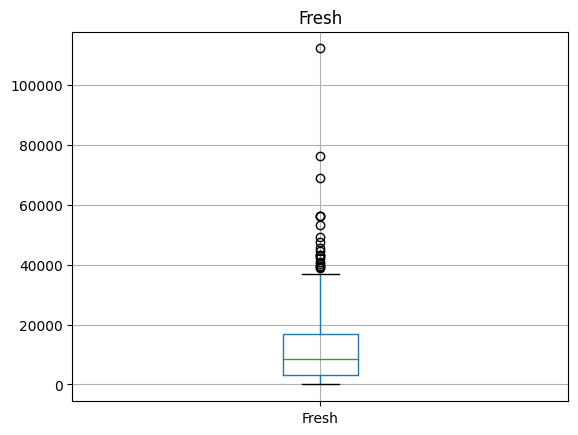

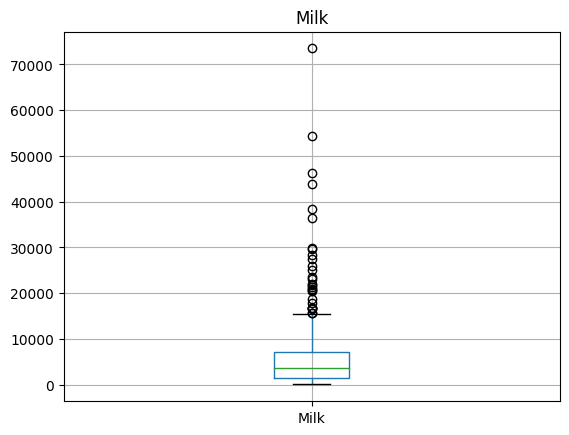

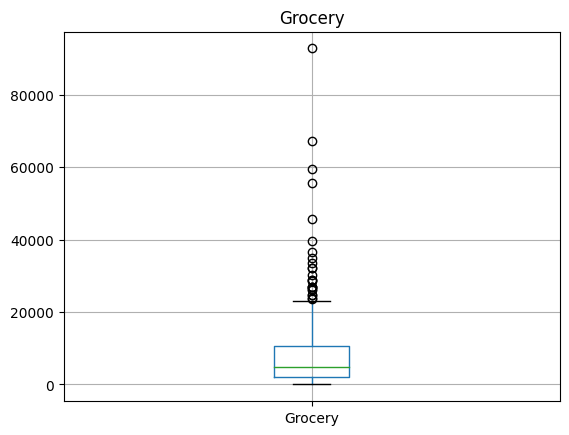

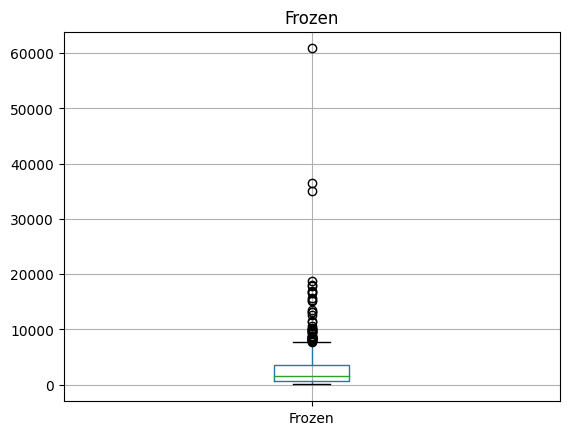

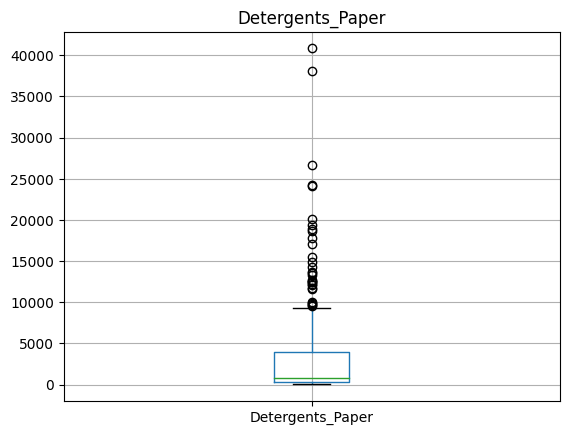

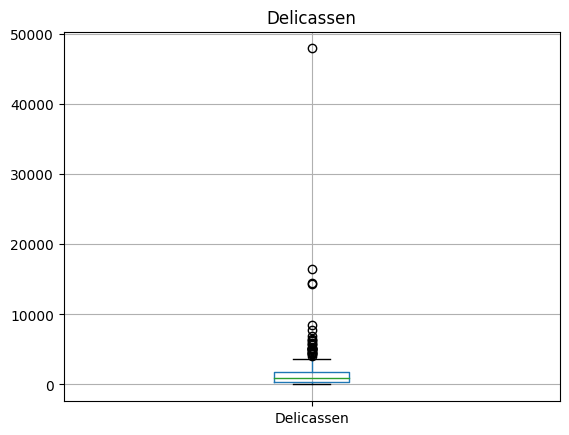

In [9]:
import matplotlib.pyplot as plt
for col in df.columns:
  plt.figure()
  df.boxplot([col])
  plt.title(col)

In [10]:
out_col =['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']

In [11]:
for col in out_col:
 Q1 = df[col].quantile(0.25)
 Q2 = df[col].quantile(0.50)
 Q3 = df[col].quantile(0.75)
 IQR = Q3 - Q1
 lower_bound = Q1 - 1.5 * IQR
 upper_bound = Q3 + 1.5 * IQR
 df[col] = df[col].clip(lower_bound, upper_bound)

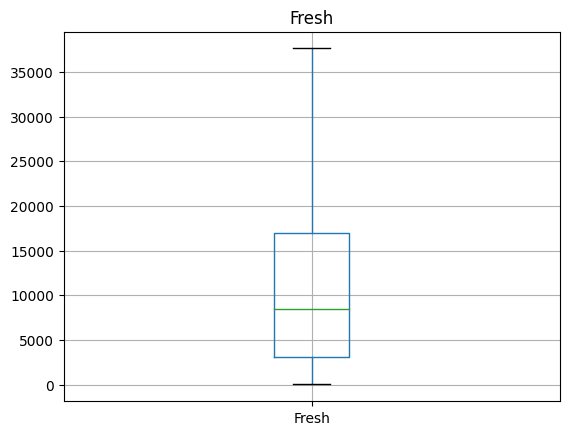

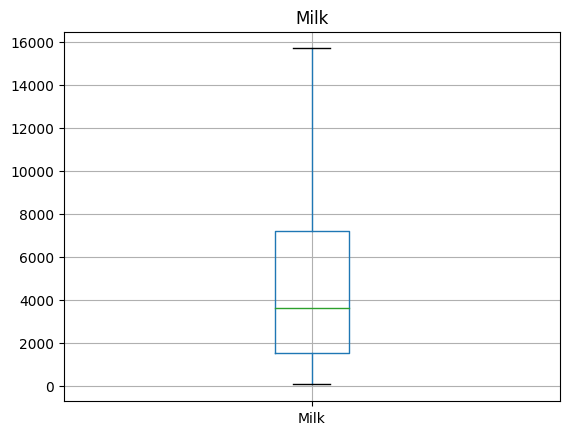

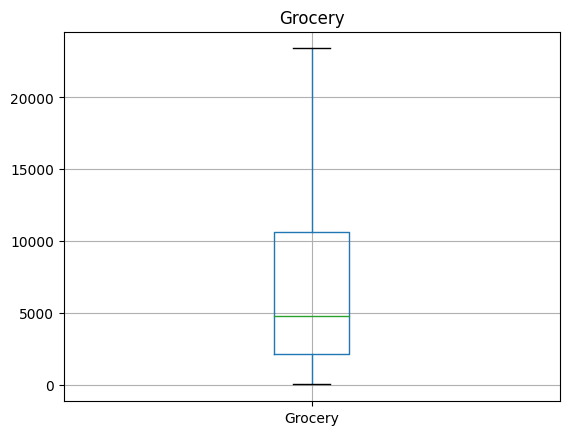

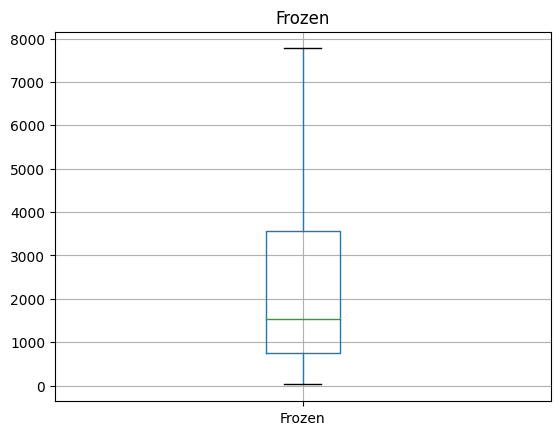

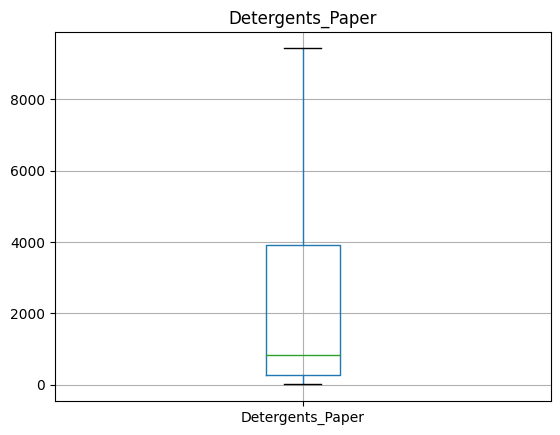

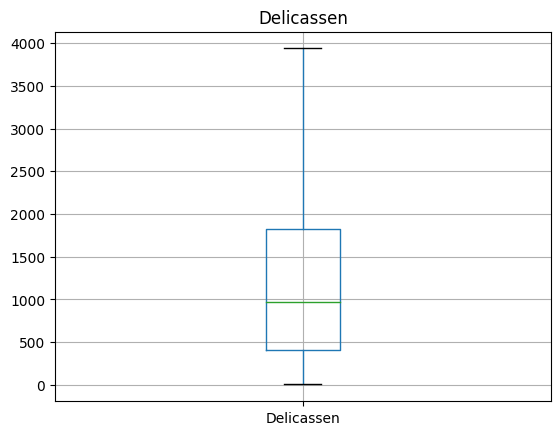

In [12]:
import matplotlib.pyplot as plt
for col in df.columns:
  plt.figure()
  df.boxplot([col])
  plt.title(col)

In [13]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
for col in df.columns:
  df[col]=scaler.fit_transform(df[[col]])

In [14]:
df_scaled = pd.DataFrame(df, columns=df.columns)
df_scaled

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.128573,1.051586,0.049267,-0.953244,0.095792,0.065892
1,-0.421627,1.086735,0.353865,-0.309735,0.306519,0.470759
2,-0.490647,0.858040,0.067935,-0.042437,0.382435,2.469440
3,0.187004,-0.879308,-0.457635,1.619962,-0.641923,0.481851
4,1.103677,0.082487,-0.005824,0.585275,-0.209575,2.469440
...,...,...,...,...,...,...
435,1.798584,1.598216,1.334130,2.188748,-0.752563,0.866381
436,2.576996,-0.825672,-0.982295,0.832619,-0.782861,0.997640
437,0.311123,2.382670,2.454609,-0.860542,2.392299,0.554875
438,-0.104664,-0.700141,-0.759501,-0.610704,-0.757329,0.793358


In [15]:
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.128573,1.051586,0.049267,-0.953244,0.095792,0.065892
1,-0.421627,1.086735,0.353865,-0.309735,0.306519,0.470759
2,-0.490647,0.858040,0.067935,-0.042437,0.382435,2.469440
3,0.187004,-0.879308,-0.457635,1.619962,-0.641923,0.481851
4,1.103677,0.082487,-0.005824,0.585275,-0.209575,2.469440


In [16]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3,random_state=42)
kmeans.fit(df_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

In [17]:
pred_cluster = kmeans.predict(df_scaled)

In [18]:
pred_cluster

array([1, 0, 0, 2, 2, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 2, 1, 1, 1,
       2, 0, 0, 1, 1, 1, 0, 2, 2, 1, 1, 2, 1, 1, 2, 0, 0, 2, 2, 2, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 2, 0, 2, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 2, 1, 2, 2, 2, 2, 1, 2, 2, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 2,
       2, 2, 1, 2, 0, 2, 0, 1, 1, 1, 1, 1, 0, 0, 1, 2, 1, 1, 0, 0, 1, 0,
       1, 0, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       2, 2, 1, 1, 1, 2, 0, 2, 1, 1, 1, 1, 0, 0, 2, 1, 1, 0, 1, 2, 2, 0,
       1, 1, 0, 0, 2, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       0, 2, 0, 2, 0, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1,
       1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

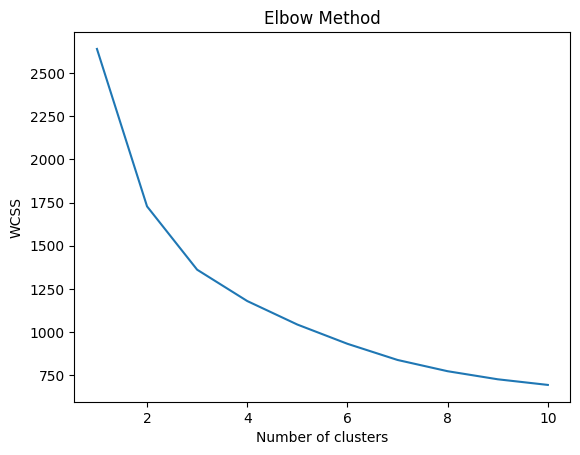

In [19]:
wcss = []
for i in range(1, 11):
   kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
   kmeans.fit(df)
   wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [20]:
from sklearn.cluster import AgglomerativeClustering
agglo_clustering = AgglomerativeClustering(metric='euclidean', linkage='ward')
y_agglo = agglo_clustering.fit_predict(df)

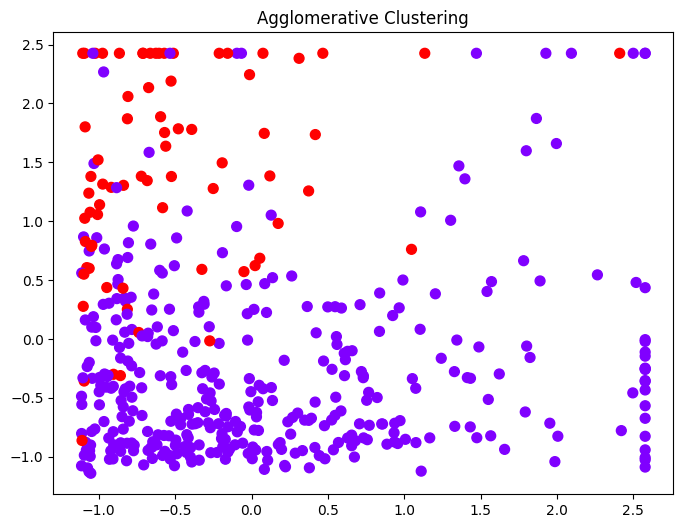

In [21]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Fresh'],df['Milk'], c=y_agglo, cmap='rainbow',s=50)
centroids = kmeans.cluster_centers_
plt.title('Agglomerative Clustering')
plt.show()

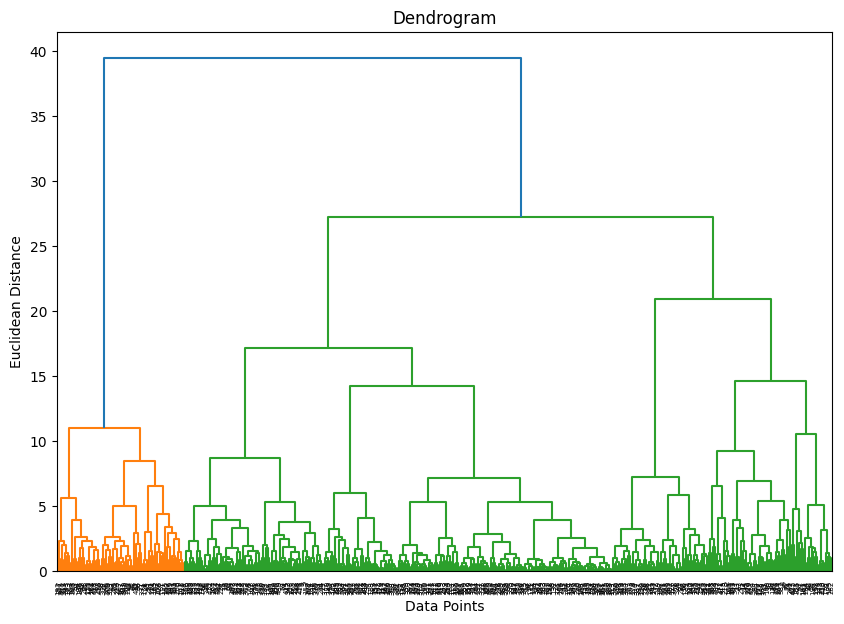

In [22]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(df, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

In [23]:
from sklearn.metrics import silhouette_score

In [24]:
silhouette_avg = silhouette_score(df, y_agglo)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.37466552368528816


In [25]:
silh_score = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    labels = kmeans.fit_predict(df)
    silh_avg = silhouette_score(df, labels)
    silh_score.append(silh_avg)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

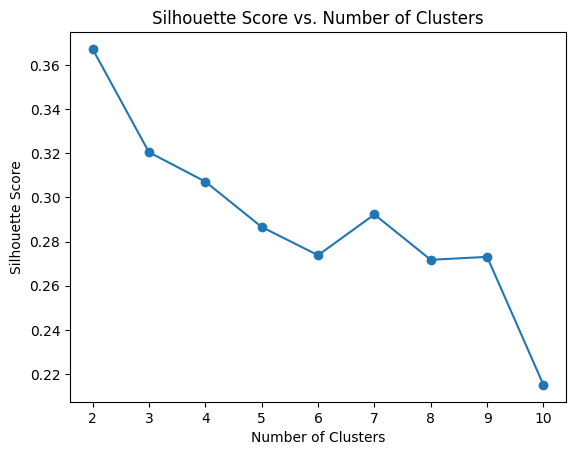

In [26]:
plt.plot(range(2, 11), silh_score, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()